In [ ]:
import os
from google.colab import files

directories = ['model', 'diag_reports', 'eval_reports', 'tables']
for directory in directories:
  if not os.path.exists(directory):
      os.makedirs(directory)

In [ ]:
!pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 50.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using

In [ ]:
import sdv
import matplotlib.pyplot as plt
import seaborn as sns
from sdv.evaluation.single_table import QualityReport, DiagnosticReport, evaluate_quality, get_column_pair_plot, get_column_plot, run_diagnostic

from sdv.datasets.demo import download_demo, get_available_demos
import numpy as np

In [ ]:
get_available_demos(modality='single_table')

,dataset_name,size_MB,num_tables
0,KRK_v1,0.06,1
1,adult,3.91,1
2,alarm,4.52,1
3,asia,1.28,1
4,census,98.17,1
5,census_extended,4.95,1
6,child,3.20,1
7,covtype,255.65,1
8,credit,68.35,1
9,expedia_hotel_logs,0.20,1


In [ ]:
dataset_name = 'fake_hotel_guests'
df, metadata = download_demo(dataset_name=dataset_name, modality='single_table')

In [ ]:
table_path = f'tables/{dataset_name}.csv'
df.to_csv(table_path)
# files.download(table_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,michaelsanders@shaw.net,False,BASIC,37.89,27 Dec 2020,29 Dec 2020,131.23,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,False,BASIC,24.37,30 Dec 2020,02 Jan 2021,114.43,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,True,DELUXE,0.00,17 Sep 2020,18 Sep 2020,368.33,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380
3,gsims@terry.com,False,BASIC,NaN,28 Dec 2020,31 Dec 2020,115.61,"77 Massachusetts Ave\nCambridge, MA 02139",4969551998845740
4,misty33@smith.biz,False,BASIC,16.45,05 Apr 2020,NaN,122.41,"1234 Corporate Drive\nBoston, MA 02116",3558512986488983


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   guest_email         500 non-null    object 
 1   has_rewards         500 non-null    bool   
 2   room_type           500 non-null    object 
 3   amenities_fee       455 non-null    float64
 4   checkin_date        500 non-null    object 
 5   checkout_date       480 non-null    object 
 6   room_rate           500 non-null    float64
 7   billing_address     500 non-null    object 
 8   credit_card_number  500 non-null    int64  
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 31.9+ KB


In [ ]:
metadata

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "primary_key": "guest_email",
    "columns": {
        "guest_email": {
            "sdtype": "email",
            "pii": true
        },
        "has_rewards": {
            "sdtype": "boolean"
        },
        "room_type": {
            "sdtype": "categorical"
        },
        "amenities_fee": {
            "sdtype": "numerical",
            "computer_representation": "Float"
        },
        "checkin_date": {
            "sdtype": "datetime",
            "datetime_format": "%d %b %Y"
        },
        "checkout_date": {
            "sdtype": "datetime",
            "datetime_format": "%d %b %Y"
        },
        "room_rate": {
            "sdtype": "numerical",
            "computer_representation": "Float"
        },
        "billing_address": {
            "sdtype": "address",
            "pii": true
        },
        "credit_card_number": {
            "sdtype": "credit_card_number",
            "pii": true
        }


                    amenities_fee  room_rate  credit_card_number
amenities_fee            1.000000   0.008852            0.016077
room_rate                0.008852   1.000000            0.045333
credit_card_number       0.016077   0.045333            1.000000


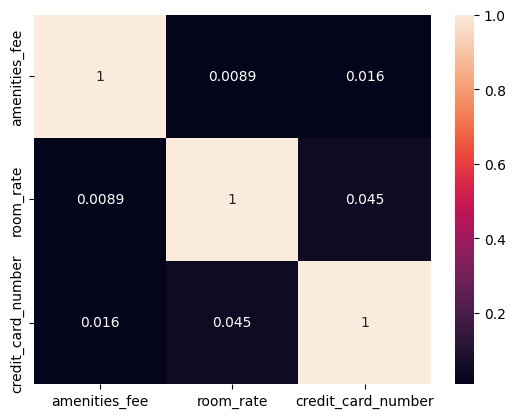

In [ ]:
numeric_cols = df.select_dtypes(include=[int, float]).columns
numeric_df = df[numeric_cols]

if len(numeric_cols) > 1:
    correlation_matrix = numeric_df.corr()
    print(correlation_matrix)
    sns.heatmap(correlation_matrix, cmap='rocket', annot=True)

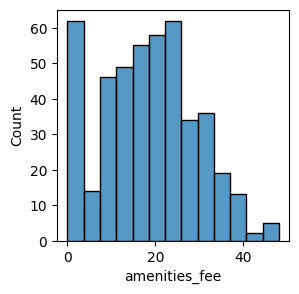

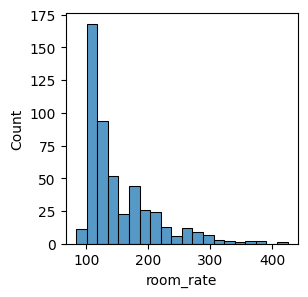

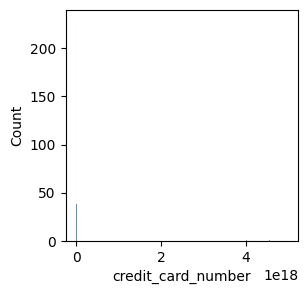

In [ ]:
for f in numeric_df:
    plt.figure(figsize=(3, 3))
    sns.histplot(df[f])
    plt.show()

In [ ]:
from sdv.single_table import GaussianCopulaSynthesizer, CopulaGANSynthesizer, CTGANSynthesizer, TVAESynthesizer

In [ ]:
clf1 = GaussianCopulaSynthesizer(metadata)
clf2 = CopulaGANSynthesizer(metadata, verbose=True)
clf3 = CTGANSynthesizer(metadata, verbose=True)
clf4 = TVAESynthesizer(metadata)

In [ ]:
clf1.fit(df)
d1 = clf1.sample(500)
# clf1.save('model/GaussianFakeHotelGuests.pkl')

/usr/local/lib/python3.10/dist-packages/rdt/transformers/pii/anonymizer.py:118: FutureWarning: The 'enforce_uniqueness' parameter is no longer supported. Please use the 'cardinality_rule' parameter instead.
  warnings.warn(


In [ ]:
clf2.fit(df)
d2 = clf2.sample(500)
# clf2.save('model/CopulaFakeHotelGuests.pkl')

/usr/local/lib/python3.10/dist-packages/rdt/transformers/pii/anonymizer.py:118: FutureWarning: The 'enforce_uniqueness' parameter is no longer supported. Please use the 'cardinality_rule' parameter instead.
  warnings.warn(
Gen. (-0.67) | Discrim. (-0.26): 100%|██████████| 300/300 [00:13<00:00, 22.83it/s]


In [ ]:
clf3.fit(df)
d3 = clf3.sample(500)
# clf3.save('model/CTGanFakeHotelGuests.pkl')

/usr/local/lib/python3.10/dist-packages/rdt/transformers/pii/anonymizer.py:118: FutureWarning: The 'enforce_uniqueness' parameter is no longer supported. Please use the 'cardinality_rule' parameter instead.
  warnings.warn(
Gen. (-0.69) | Discrim. (0.05): 100%|██████████| 300/300 [00:09<00:00, 30.72it/s]


In [ ]:
clf4.fit(df)
d4 = clf4.sample(500)
# clf4.save('model/TVAEFakeHotelGuests.pkl')

/usr/local/lib/python3.10/dist-packages/rdt/transformers/pii/anonymizer.py:118: FutureWarning: The 'enforce_uniqueness' parameter is no longer supported. Please use the 'cardinality_rule' parameter instead.
  warnings.warn(


In [ ]:
from google.colab import files

for f in os.listdir('model'):
  files.download(f)

In [ ]:
from sdv.evaluation.single_table import evaluate_quality, run_diagnostic

In [ ]:
quality_report1 = evaluate_quality(df, d1, metadata)
quality_report2 = evaluate_quality(df, d2, metadata)
quality_report3 = evaluate_quality(df, d3, metadata)
quality_report4 = evaluate_quality(df, d4, metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 9/9 [00:00<00:00, 601.40it/s]|
Column Shapes Score: 89.11%

(2/2) Evaluating Column Pair Trends: |██████████| 36/36 [00:00<00:00, 121.60it/s]|
Column Pair Trends Score: 88.3%

Overall Score (Average): 88.7%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 9/9 [00:00<00:00, 838.53it/s]|
Column Shapes Score: 75.38%

(2/2) Evaluating Column Pair Trends: |██████████| 36/36 [00:00<00:00, 141.59it/s]|
Column Pair Trends Score: 74.02%

Overall Score (Average): 74.7%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 9/9 [00:00<00:00, 801.60it/s]|
Column Shapes Score: 75.77%

(2/2) Evaluating Column Pair Trends: |██████████| 36/36 [00:00<00:00, 144.54it/s]|
Column Pair Trends Score: 73.93%

Overall Score (Average): 74.85%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 9/9 [00:00<00:00, 593.36it/s]|
Column Shapes Score: 85.76%

(2/2) Evaluating Column Pair Trends: |███

In [ ]:
fig1 = quality_report1.get_details('Column Shapes')
fig2 = quality_report2.get_details('Column Shapes')
fig3 = quality_report3.get_details('Column Shapes')
fig4 = quality_report4.get_details('Column Shapes')

In [ ]:
fig1, fig2, fig3, fig4

(          Column        Metric     Score
 0    has_rewards  TVComplement  0.986000
 1      room_type  TVComplement  0.968000
 2  amenities_fee  KSComplement  0.717449
 3   checkin_date  KSComplement  0.970000
 4  checkout_date  KSComplement  0.975000
 5      room_rate  KSComplement  0.730000,
           Column        Metric     Score
 0    has_rewards  TVComplement  0.824000
 1      room_type  TVComplement  0.760000
 2  amenities_fee  KSComplement  0.745055
 3   checkin_date  KSComplement  0.650000
 4  checkout_date  KSComplement  0.761450
 5      room_rate  KSComplement  0.782000,
           Column        Metric     Score
 0    has_rewards  TVComplement  0.758000
 1      room_type  TVComplement  0.746000
 2  amenities_fee  KSComplement  0.582418
 3   checkin_date  KSComplement  0.810000
 4  checkout_date  KSComplement  0.911730
 5      room_rate  KSComplement  0.738000,
           Column        Metric     Score
 0    has_rewards  TVComplement  0.906000
 1      room_type  TVComplement

In [58]:
dtypes = ['categorical', 'boolean', 'datetime', 'numerical']
data = {
    'GaussianCopulaGan': d1,
    'CopulaGan': d2,
    'CTGan': d3,
    'TVAE': d4,
}
for k, sd in data.items():
  print(k)
  for k, v in metadata.columns.items():
    if v['sdtype'] in dtypes:
      fig = get_column_plot(df, sd, metadata, column_name=k)
      fig.show()

GaussianCopulaGan


CopulaGan


CTGan


TVAE


In [ ]:
quality_report1.get_visualization('Column Shapes')

In [ ]:
quality_report2.get_visualization('Column Shapes')

In [ ]:
quality_report3.get_visualization('Column Shapes')

In [ ]:
quality_report4.get_visualization('Column Shapes')

In [ ]:
diagnostic_report1 = run_diagnostic(df, d1, metadata)
diagnostic_report2 = run_diagnostic(df, d2, metadata)
diagnostic_report3 = run_diagnostic(df, d3, metadata)
diagnostic_report4 = run_diagnostic(df, d4, metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 9/9 [00:00<00:00, 709.18it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 172.81it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 9/9 [00:00<00:00, 814.89it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 304.05it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 9/9 [00:00<00:00, 852.89it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 300.67it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 9/9 [00:00<00:00, 928.56it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 298.

In [ ]:
diagnostic_report1.get_visualization('Data Validity')

In [ ]:
diagnostic_report2.get_visualization('Data Validity')

In [ ]:
diagnostic_report3.get_visualization('Data Validity')

In [ ]:
diagnostic_report4.get_visualization('Data Validity')

GaussianCopulaGan
                    amenities_fee  room_rate  credit_card_number
amenities_fee            1.000000  -0.068573           -0.013699
room_rate               -0.068573   1.000000           -0.044425
credit_card_number      -0.013699  -0.044425            1.000000


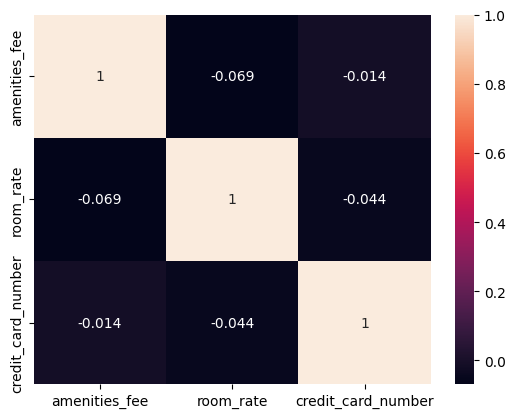

CopulaGan
                    amenities_fee  room_rate  credit_card_number
amenities_fee            1.000000  -0.018240           -0.037516
room_rate               -0.018240   1.000000            0.048296
credit_card_number      -0.037516   0.048296            1.000000


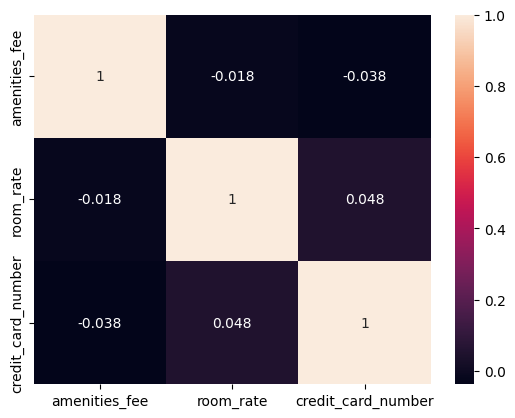

CTGan
                    amenities_fee  room_rate  credit_card_number
amenities_fee            1.000000   0.004151           -0.025427
room_rate                0.004151   1.000000            0.008591
credit_card_number      -0.025427   0.008591            1.000000


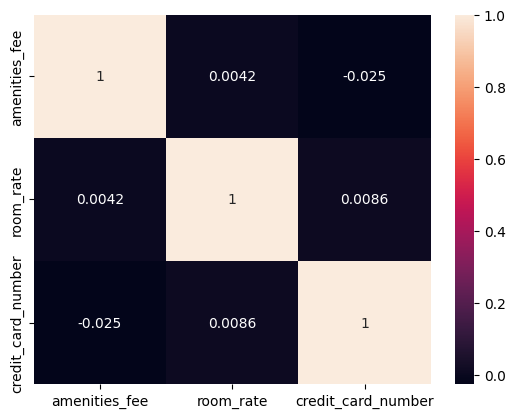

TVAE
                    amenities_fee  room_rate  credit_card_number
amenities_fee            1.000000  -0.070149            0.063896
room_rate               -0.070149   1.000000            0.041747
credit_card_number       0.063896   0.041747            1.000000


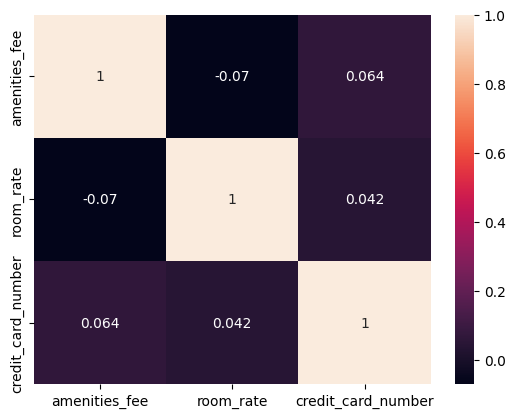

In [61]:
for k, sd in data.items():
  print(k)
  syn_numeric_cols = sd.select_dtypes(include=[int, float]).columns
  syn_numeric_df = sd[numeric_cols]
  if len(syn_numeric_cols) > 1:
      correlation_matrix = syn_numeric_df.corr()
      print(correlation_matrix)
      sns.heatmap(correlation_matrix, cmap='rocket', annot=True)
      plt.show()